# Workshop 11 - Exercise 1 (Wine MLP)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score
)

import seaborn as sns

# Part 1: Load + Explore

In [2]:
wine = load_wine()

X = wine.data
y = wine.target

df = pd.DataFrame(X, columns=wine.feature_names)
df["target"] = y

print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

Dataset shape: (178, 14)

First 5 rows:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_dilu

# Q1: samples and features

In [3]:
n_samples = X.shape[0]
n_features = X.shape[1]
print(f"\nSamples: {n_samples}, Features: {n_features}")


Samples: 178, Features: 13


# Q2: class distribution

In [4]:
class_counts = pd.Series(y).value_counts().sort_index()
print("\nClass distribution (by class index):")
print(class_counts)


Class distribution (by class index):
0    59
1    71
2    48
Name: count, dtype: int64


# Q3: missing values

In [5]:
missing_total = df.isnull().sum().sum()
print("\nTotal missing values:", missing_total)



Total missing values: 0


# Q4: class names

In [6]:
print("\nWine class names:", wine.target_names)


Wine class names: ['class_0' 'class_1' 'class_2']


# Part 1.2: Split + Scale

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

print("\nTraining set shape:", X_train_scaled.shape)
print("Testing set shape:", X_test_scaled.shape)
print("Scaler mean:", scaler.mean_)
print("Scaler scale:", scaler.scale_)


Training set shape: (142, 13)
Testing set shape: (36, 13)
Scaler mean: [1.29714789e+01 2.34000000e+00 2.36485915e+00 1.96253521e+01
 9.96338028e+01 2.27373239e+00 1.98535211e+00 3.60140845e-01
 1.60021127e+00 4.98964788e+00 9.48985915e-01 2.60619718e+00
 7.39478873e+02]
Scaler scale: [7.99690034e-01 1.09740026e+00 2.67433646e-01 3.36892252e+00
 1.48847587e+01 6.19261952e-01 9.48593965e-01 1.18790773e-01
 5.77731684e-01 2.32671090e+00 2.25847231e-01 6.87217017e-01
 3.00435522e+02]


# Part 2: Model Config

In [8]:
mlp = MLPClassifier(
    hidden_layer_sizes=(50, 25),
    activation="relu",
    solver="adam",
    max_iter=500,
    random_state=42
)

print("\nModel architecture:", mlp.hidden_layer_sizes)
print("Activation function:", mlp.activation)
print("Solver:", mlp.solver)
print("Maximum iterations:", mlp.max_iter)


Model architecture: (50, 25)
Activation function: relu
Solver: adam
Maximum iterations: 500


# Part 2.2: Train

In [9]:
mlp.fit(X_train_scaled, y_train)

print(f"\nTraining completed in {mlp.n_iter_} iterations")
print(f"Final training loss: {mlp.loss_:.4f}")
print(f"Training set accuracy: {mlp.score(X_train_scaled, y_train):.4f}")

if mlp.n_iter_ == mlp.max_iter:
    print("Warning: Model may not have converged. Consider increasing max_iter.")
else:
    print("Model converged successfully.")


Training completed in 195 iterations
Final training loss: 0.0068
Training set accuracy: 1.0000
Model converged successfully.


# Part 3: Evaluate


Test Accuracy: 1.0000 (100.00%)
Number of test samples: 36
Number of correct predictions: 36

Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        12
     class_1       1.00      1.00      1.00        14
     class_2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



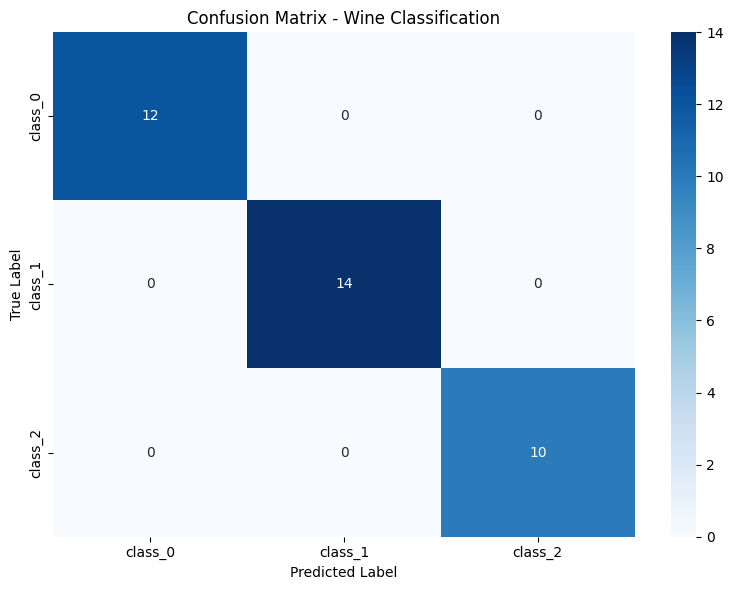


Weighted Precision: 1.0000
Weighted Recall: 1.0000
Weighted F1-Score: 1.0000


In [10]:
y_pred = mlp.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nTest Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Number of test samples: {len(y_test)}")
print(f"Number of correct predictions: {int((y_pred == y_test).sum())}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=wine.target_names))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm, annot=True, fmt="d", cmap="Blues",
    xticklabels=wine.target_names,
    yticklabels=wine.target_names
)
plt.title("Confusion Matrix - Wine Classification")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.tight_layout()
plt.show()

precision = precision_score(y_test, y_pred, average="weighted")
recall    = recall_score(y_test, y_pred, average="weighted")
f1        = f1_score(y_test, y_pred, average="weighted")

print(f"\nWeighted Precision: {precision:.4f}")
print(f"Weighted Recall: {recall:.4f}")
print(f"Weighted F1-Score: {f1:.4f}")


Part 1.1 (Q1–Q4)

1. How many samples and features does the dataset contain?

178 samples, 13 features.

2. What are the different wine classes (targets) and their distribution?

Targets are 0, 1, 2. Distribution (counts) is printed by value_counts() in the code.

3. Are there any missing values in the dataset?

No (total missing values = 0).

4. What are the names of the three wine classes?

wine.target_names → class_0, class_1, class_2.

Part 1.2 (Q5–Q8)

5. Why do we split the data before scaling?

To prevent data leakage: test-set statistics must not affect training transformations.

6. Why should we fit the scaler only on training data?

So the scaler’s mean/std come only from training data; the test set stays unseen and unbiased.

7. What is the purpose of using random state?

To make results reproducible (same split, same training behavior).

8. What do the scaler’s mean and scale attributes represent?

mean_: mean of each feature in training data

scale_: standard deviation of each feature in training data (used to standardize)

Part 2 (Q9–Q12)

9. What does the loss value represent?

It’s the model’s training error (how far predictions are from true labels) that the optimizer minimizes.

10. How many iterations did the training take to converge?

The exact number is mlp.n_iter_ (printed). It will vary slightly by run/environment.

11. What might it mean if the loss is very high?

Underfitting, poor scaling, bad hyperparameters (too few neurons/iterations), or model struggling to learn patterns.

12. What is the training accuracy of your model?

Printed by: mlp.score(X_train_scaled, y_train).

Part 3 (Q13–Q16)

13. Which class has the best performance? Which has the worst?

Use the classification report: the class with highest F1 is best; lowest F1 is worst. (You’ll see it directly in output.)

14. What is the precision, recall, and F1-score for each class?

Shown in classification_report(y_test, y_pred, target_names=wine.target_names).

15. Based on the confusion matrix, what types of errors is the model making?

The off-diagonal cells show which classes get confused (e.g., some class_1 predicted as class_2, etc.). Interpret based on your plotted matrix.

16. Is there any class imbalance affecting the results?

Wine has a mild imbalance (class counts are not equal), but it’s not extreme; using stratify=y helps keep the same distribution in train/test.